Importing dependencies

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
file_path = '/content/CreditCardDataset.csv'

# Adjust the path if needed
credit_card_data = pd.read_csv(file_path)

In [30]:
# Display the first few rows of the dataset
print(credit_card_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [31]:
# Define the features (independent variables) and the target (dependent variable)
X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

In [32]:
# Split the dataset into training and testing sets

class_counts = y.value_counts()
print("Class distribution:")
print(class_counts)
sparse_classes = class_counts[class_counts == 1].index
y_cleaned = y[~y.isin(sparse_classes)]
X_cleaned = X.loc[y_cleaned.index]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)



Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [33]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Function to evaluate model
def evaluate_model(y_test, y_pred, y_pred_prob):
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_prob))


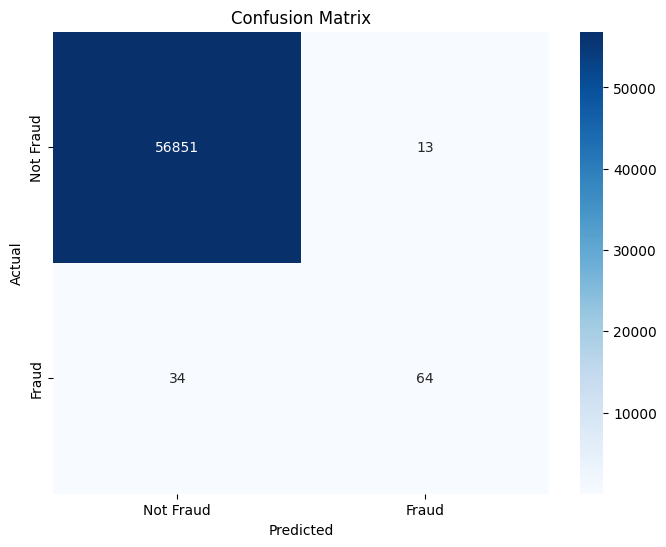

In [35]:
# Plot the confusion matrix

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict labels on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


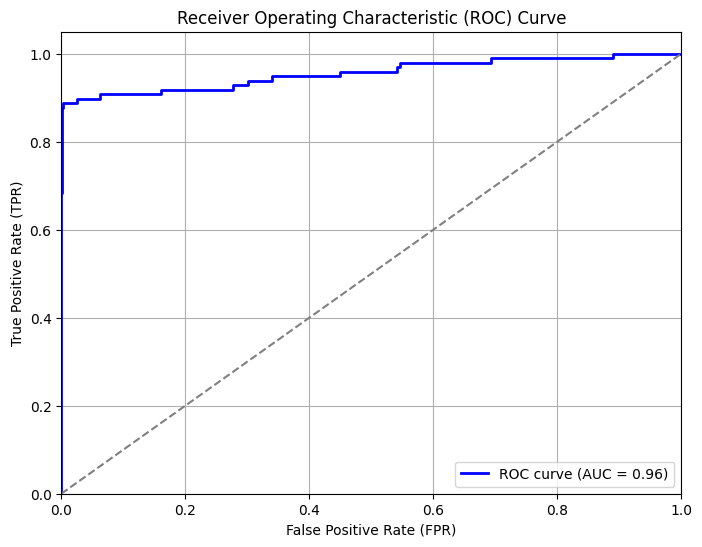

In [36]:
# Plot the ROC curve

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute ROC curve and ROC area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [37]:
# 1. Evaluate the model with original data
print("Original Data Evaluation:")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred, y_pred_prob)

Original Data Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56859     5]
 [   18    80]]
Accuracy Score: 0.9995962220427653
Precision: 0.9411764705882353
Recall: 0.8163265306122449
F1 Score: 0.8743169398907105
ROC-AUC Score: 0.9630272515590367


In [38]:
# 2. Apply SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE Oversampling Data Evaluation:")
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)
y_pred_prob_smote = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_smote, y_pred_prob_smote)

SMOTE Oversampling Data Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56852    12]
 [   17    81]]
Accuracy Score: 0.9994908886626171
Precision: 0.8709677419354839
Recall: 0.826530612244898
F1 Score: 0.8481675392670157
ROC-AUC Score: 0.9684509513569075


In [39]:
# 3. Apply Random Under Sampling
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

In [40]:
print("Undersampling Data Evaluation:")
model.fit(X_train_undersample, y_train_undersample)
y_pred_undersample = model.predict(X_test)
y_pred_prob_undersample = model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_undersample, y_pred_prob_undersample)

Undersampling Data Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54828  2036]
 [    8    90]]
Accuracy Score: 0.9641164284961904
Precision: 0.04233301975540922
Recall: 0.9183673469387755
F1 Score: 0.08093525179856115
ROC-AUC Score: 0.9776972339301504
